In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/final_dataset.csv",index_col=0,low_memory=False)

In [21]:
train.shape

(12794627, 84)

In [22]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))

train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [23]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [24]:
print(train.shape)
print(X.shape)
print(Y.shape)

(12794627, 84)
(12794627, 83)
(12794627,)


In [25]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8572400, 83)
(8572400,)
(4222227, 83)
(4222227,)


In [32]:
%%time

model=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


CPU times: user 18h 28min 19s, sys: 39.4 s, total: 18h 28min 58s
Wall time: 4h 54min 5s


In [39]:
print(model)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=25, n_neighbors=6, p=2,
           weights='uniform')


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9994564479834931
f1-acore: 0.9994627226686787
confusion matrix:
 [[2085311    1150]
 [   1145 2134621]]
Precision: 0.999461552760104
Recall_score: 0.9994638925799924
Misclassified : 2295


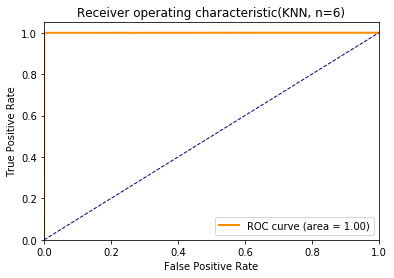

In [41]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(KNN, n=6)')
plt.legend(loc="lower right")
plt.show()
